# FLOWER CLASSIFICATION

Identifying the family of a flower can prove to be a tedious task. 
Each flower family has a set of features which are unqiue to it and can be used to identify the family that the flower belongs to.

We have designed a Machine Learning model which is trained using a dataset of 5 different flower families and can be used to identify the class that a flower belongs to by feeding the image of the flower to the model.

The program implements a Convolutional Neural Network to identify the unique features of each flower to help ensure maximum accuracy.


The model is designed using the **keras** library in python. **keras** is an API whivh follows practices to reduce cognitive load. **keras** library is ideal for easily defining the network model.

From the **sklearn** module, we import the *train_test_split* and the *labelEncoder* function. The *train_test_split* function is used to randomly divide the dataset into training set and testing set.

The **matplotlib** library is used to plot graphs to help with visualize different data.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.layers import Dense, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os 
import cv2

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn


Using TensorFlow backend.


The dataset is stored on our google drive. The program needs to connect to the google drive to access this dataset. The code below is executed to enable drive access to the program.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


The path to the location of the dataset is constructed using the **os** module.

In [0]:
path=os.path.join('gdrive','My Drive', 'Colab Notebooks','flowers','flowers' )
path

'gdrive/My Drive/Colab Notebooks/flowers/flowers'

In [0]:
x=[]
y=[]
img_size=150

### Label Assignment
The functions **label_assignment** and **make_label** are defined to label the images of the flowers with the name of their respective classes.

In [0]:
def label_assignment(img, flower_type):
  return flower_type

In [0]:
def make_label(flower_type, directory):
  for img in tqdm(os.listdir(directory)):
    label=label_assignment(img, flower_type)
    path=os.path.join(directory, img)
    img=cv2.imread(path, cv2.IMREAD_COLOR)
    img=cv2.resize(img, (img_size, img_size))
    
    x.append(np.array(img))
    y.append(str(label))

Define the paths to the different folders of the dataset in the drive.

In [0]:
daisy_flowers=path+'/daisy'
dandelion_flowers=path+'/dandelion'
rose_flowers=path+'/rose'
sunflower_flowers=path+'/sunflower'
tulip_flowers=path+'/tulip'

#### Labeling
Call the **make_label** function to label images of difference flower classes.

In [0]:
make_label('Daisy', daisy_flowers)

100%|██████████| 769/769 [06:03<00:00,  2.26it/s]


In [0]:
make_label('Dandelion', dandelion_flowers)

 79%|███████▉  | 833/1055 [06:18<01:43,  2.14it/s]

error: ignored

In [0]:
make_label('Rose', rose_flowers)


100%|██████████| 784/784 [05:58<00:00,  2.19it/s]


In [0]:
make_label('Sunflower', sunflower_flowers)


100%|██████████| 734/734 [09:02<00:00,  2.30it/s]


In [0]:
make_label('Tulip', tulip_flowers)


100%|██████████| 984/984 [11:07<00:00,  2.03it/s]


The different flower images can be visualized as plots. This is shown below.

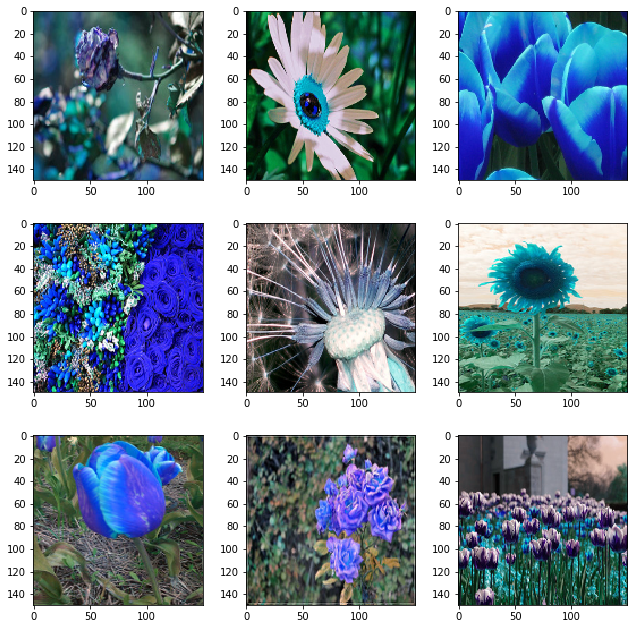

In [0]:
fig, ax=plt.subplots(3,3)
fig.set_size_inches(9,9)
for i in range(3):
  for j in range(3):
    l=rn.randint(0, len(y))
    ax[i,j].imshow(x[l])
    
plt.tight_layout()

Using label encoder to encode labels

In [0]:
le=LabelEncoder()
y=le.fit_transform(y)

In [0]:
categorical_y=to_categorical(y, 5)

In [0]:
X=np.array(x)

In [0]:
X=X.astype('float32')
X=X/255.0

Splitting the dataset into training and testing sets with test size=0.2

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,categorical_y,test_size=0.2)

In [0]:
xtrain.shape

(3283, 150, 150, 3)

Defining the model. Here, the model is set to be Sequential

In [0]:
model=Sequential()

W0802 04:01:45.349980 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Adding the different convolutional layers and along with the Dense layers.

In [0]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
          

W0802 04:01:50.125023 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 04:01:50.138959 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 04:01:50.182621 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0802 04:01:50.258283 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 04:01:50.269314 139645683107712 de

Compiling the model and then obtaining a summary of it once it is done compliing successfully.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0802 04:01:54.497933 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 04:01:54.527656 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 145, 145, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 143, 143, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 141, 141, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 140, 140, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 138, 138, 128)     73856     
__________

Generating batches of Tensor image data with real time data augmentation.

In [0]:
gen_data=ImageDataGenerator( featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=45,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True,
                           vertical_flip=False)

In [0]:
gen_data.fit(xtrain)

Fitting the model with the training and testing sets.

In [0]:
history=model.fit_generator(gen_data.flow(xtrain,ytrain,batch_size=64), epochs=5, validation_data=(xtest,ytest), steps_per_epoch=xtrain.shape[0]//32, shuffle=True)

NameError: ignored

In [0]:
#history=model.fit_generator(gen_data.flow(xtrain,ytrain,batch_size=64), epochs=5, validation_data=(xtest,ytest), steps_per_epoch=xtrain.shape[0]//32, shuffle=True)

Epoch 1/5
102/102 [==============================] - 44s 432ms/step - loss: 0.4926 - acc: 0.8102 - val_loss: 0.5660 - val_acc: 0.7771
Epoch 2/5
102/102 [==============================] - 43s 419ms/step - loss: 0.5002 - acc: 0.8135 - val_loss: 0.5599 - val_acc: 0.8088
Epoch 3/5
102/102 [==============================] - 43s 420ms/step - loss: 0.4802 - acc: 0.8193 - val_loss: 0.5635 - val_acc: 0.8039
Epoch 4/5
102/102 [==============================] - 43s 418ms/step - loss: 0.4522 - acc: 0.8323 - val_loss: 0.5690 - val_acc: 0.7795
Epoch 5/5
102/102 [==============================] - 43s 419ms/step - loss: 0.4251 - acc: 0.8394 - val_loss: 0.5370 - val_acc: 0.8051


In [0]:
#history=model.fit_generator(gen_data.flow(xtrain,ytrain,batch_size=64), epochs=2, validation_data=(xtest,ytest), steps_per_epoch=xtrain.shape[0]//32, shuffle=True)

Epoch 1/2
102/102 [==============================] - 44s 428ms/step - loss: 0.4106 - acc: 0.8496 - val_loss: 0.5983 - val_acc: 0.7954
Epoch 2/2
102/102 [==============================] - 42s 416ms/step - loss: 0.4301 - acc: 0.8403 - val_loss: 0.5560 - val_acc: 0.8173


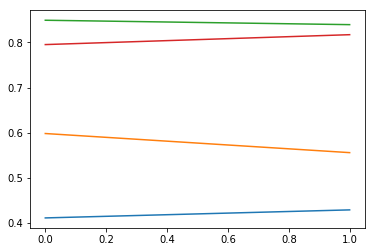

In [0]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])